In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define all models in a dictionary
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Support Vector Regressor (SVR)': SVR(),
    'K-Nearest Neighbors (KNN)': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'XGBoost Regressor': xgb.XGBRegressor(),
    'LightGBM Regressor': lgb.LGBMRegressor()
}

# Step 4: Train and evaluate each model
results = {}

for model_name, model in models.items():
    print(f'\nEvaluating {model_name}...')
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {'MSE': mse, 'R2': r2}
    
    # Output evaluation metrics
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R-squared: {r2:.2f}')





Evaluating Linear Regression...
Mean Squared Error: 0.56
R-squared: 0.58

Evaluating Ridge Regression...
Mean Squared Error: 0.56
R-squared: 0.58

Evaluating Lasso Regression...
Mean Squared Error: 0.94
R-squared: 0.28

Evaluating ElasticNet Regression...
Mean Squared Error: 0.76
R-squared: 0.42

Evaluating Support Vector Regressor (SVR)...
Mean Squared Error: 1.33
R-squared: -0.02

Evaluating K-Nearest Neighbors (KNN)...
Mean Squared Error: 1.12
R-squared: 0.15

Evaluating Decision Tree Regressor...
Mean Squared Error: 0.49
R-squared: 0.63

Evaluating Random Forest Regressor...
Mean Squared Error: 0.25
R-squared: 0.81

Evaluating Gradient Boosting Regressor...
Mean Squared Error: 0.29
R-squared: 0.78

Evaluating AdaBoost Regressor...
Mean Squared Error: 0.77
R-squared: 0.41

Evaluating XGBoost Regressor...
Mean Squared Error: 0.22
R-squared: 0.83

Evaluating LightGBM Regressor...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001102 seconds.
Y


All Model Evaluation Results:
                                     MSE        R2
Linear Regression               0.555892  0.575788
Ridge Regression                0.555803  0.575855
Lasso Regression                0.938034  0.284167
ElasticNet Regression           0.764556  0.416552
Support Vector Regressor (SVR)  1.332012 -0.016485
K-Nearest Neighbors (KNN)       1.118682  0.146310
Decision Tree Regressor         0.489749  0.626263
Random Forest Regressor         0.251745  0.807888
Gradient Boosting Regressor     0.294079  0.775582
AdaBoost Regressor              0.768127  0.413826
XGBoost Regressor               0.222590  0.830137
LightGBM Regressor              0.214848  0.836045


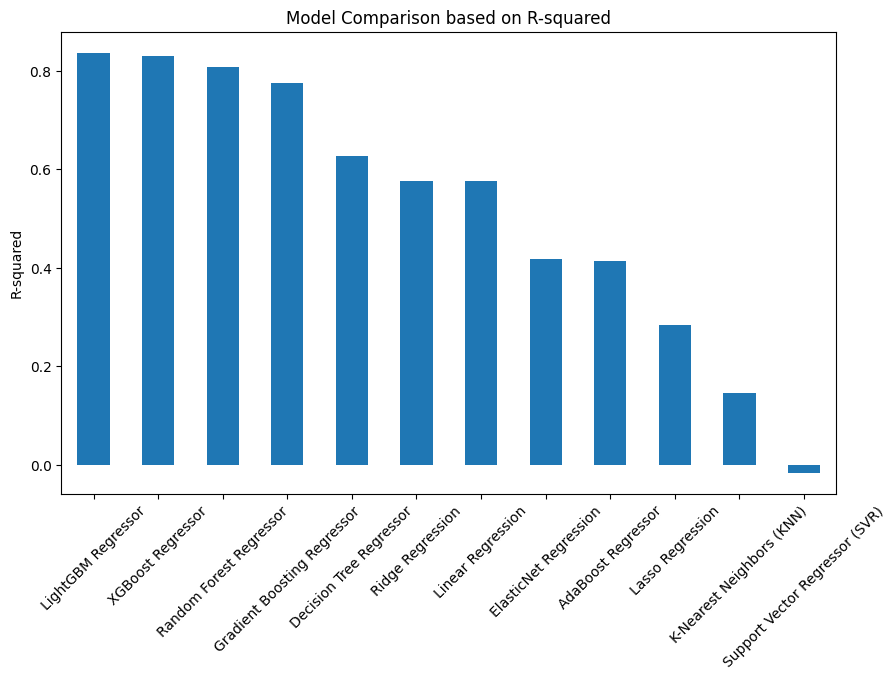

In [7]:
# Step 5: Display a summary of all results
results_df = pd.DataFrame(results).T
print("\nAll Model Evaluation Results:")
print(results_df)

# Step 6: Optional: Plot the results for comparison
results_df.sort_values(by='R2', ascending=False)['R2'].plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison based on R-squared')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Step 2: Feature Engineering - Scale features and create polynomial features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optionally, create polynomial features for some models to capture non-linear relationships
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 4: Define all models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Support Vector Regressor (SVR)': SVR(),
    'K-Nearest Neighbors (KNN)': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'XGBoost Regressor': xgb.XGBRegressor(),
    'LightGBM Regressor': lgb.LGBMRegressor()
}

# Step 5: Hyperparameter tuning for Random Forest and XGBoost using GridSearchCV
# Define hyperparameters for GridSearchCV (you can expand this with more parameters)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9]
}

# Initialize models for hyperparameter tuning
rf_model = RandomForestRegressor()
xgb_model = xgb.XGBRegressor()

# GridSearchCV to find the best parameters
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Step 6: Cross-validation and Hyperparameter Tuning
best_models = {}

for model_name, model in models.items():
    print(f'\nEvaluating {model_name}...')
    
    # Hyperparameter tuning for RandomForest and XGBoost
    if model_name == 'Random Forest Regressor':
        grid_search_rf.fit(X_train, y_train)
        best_models['Random Forest Regressor'] = grid_search_rf.best_estimator_
        print(f'Best Random Forest params: {grid_search_rf.best_params_}')
        best_model_rf = grid_search_rf.best_estimator_
        model = best_model_rf
        
    elif model_name == 'XGBoost Regressor':
        grid_search_xgb.fit(X_train, y_train)
        best_models['XGBoost Regressor'] = grid_search_xgb.best_estimator_
        print(f'Best XGBoost params: {grid_search_xgb.best_params_}')
        best_model_xgb = grid_search_xgb.best_estimator_
        model = best_model_xgb

    # Train model
    model.fit(X_train, y_train)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f'Cross-validation MSE scores: {-cv_scores}')
    print(f'Mean CV MSE: {-cv_scores.mean():.2f}')
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R-squared: {r2:.2f}')
    
    # Store the results
    best_models[model_name] = {'Model': model, 'MSE': mse, 'R2': r2}

# Step 7: Display all results
results_df = pd.DataFrame.from_dict(best_models, orient='index')
print("\nAll Model Evaluation Results:")
print(results_df)

# Step 8: Optional: Visualize the comparison
results_df.sort_values(by='R2', ascending=False)['R2'].plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison based on R-squared')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
plt.show()



Evaluating Linear Regression...
Cross-validation MSE scores: [ 0.42975563  0.71979774 47.61788144  0.83101268  2.6428273 ]
Mean CV MSE: 10.45
Mean Squared Error: 0.46
R-squared: 0.65

Evaluating Ridge Regression...
Cross-validation MSE scores: [ 0.42985451  0.69656103 35.20850091  0.71846045  2.48169836]
Mean CV MSE: 7.91
Mean Squared Error: 0.46
R-squared: 0.65

Evaluating Lasso Regression...
Cross-validation MSE scores: [1.32064132 1.24956963 1.30005466 1.25618354 1.3188807 ]
Mean CV MSE: 1.29
Mean Squared Error: 1.26
R-squared: 0.03

Evaluating ElasticNet Regression...
Cross-validation MSE scores: [1.08992897 1.0154312  1.05575355 1.03628617 1.0695826 ]
Mean CV MSE: 1.05
Mean Squared Error: 1.04
R-squared: 0.21

Evaluating Support Vector Regressor (SVR)...
Cross-validation MSE scores: [0.77858239 0.72808949 0.56903104 0.7197331  0.75540168]
Mean CV MSE: 0.71
Mean Squared Error: 0.70
R-squared: 0.47

Evaluating K-Nearest Neighbors (KNN)...
Cross-validation MSE scores: [0.42869361 0.

KeyboardInterrupt: 